# 1.Classification

# 1.1 Import Libraries

In [1]:
import warnings,os,cv2,imghdr,matplotlib
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import clear_output

C:\Users\Emertat\AppData\Local\Temp\ipykernel_5084\48323255.py:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import warnings,os,cv2,imghdr,matplotlib


# 1.2 Loading Dataset

In [2]:
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('INFO')
df = pd.read_csv('E:/datasets/coffee bean/Coffee Bean.csv')
df

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train
...,...,...,...,...
1595,3,test/Medium/medium (95).png,Medium,test
1596,3,test/Medium/medium (96).png,Medium,test
1597,3,test/Medium/medium (97).png,Medium,test
1598,3,test/Medium/medium (98).png,Medium,test


In [3]:
#setting up the training dir
data_dir = "E:/datasets/coffee bean/train"
image_exts = ['.png']

In [4]:
#create an image dataset with the given images
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1200 files belonging to 4 classes.


In [5]:
#itertaor for image iteration
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

clear_output()

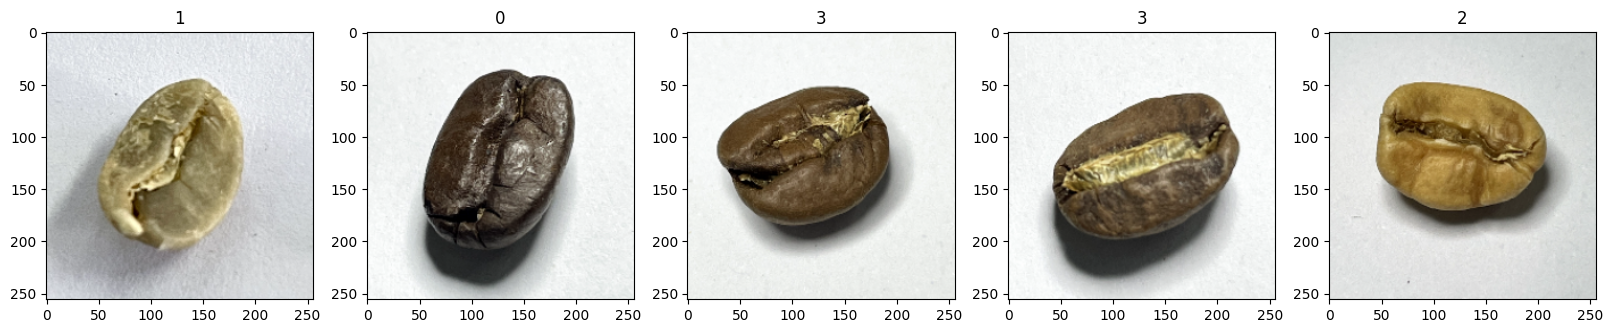

In [6]:
#Visualise a random batch
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 1.3 Data Preparation

In [7]:
import random

IMG_SIZE = 50

DATADIR = 'E:/datasets/coffee bean/train'

CATEGORIES = ['Dark', 'Green', 'Light','Medium']

for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)

training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.asarray(y)

In [8]:
import pickle
# Creating the files containing all the information about our model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

# 1.4 Model Building and Training

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 4 neurons for 4 classes
model.add(Dense(4))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.1)





Epoch 1/40


34/34 [==============================] - 2s 19ms/step - loss: 1.2211 - accuracy: 0.4361 - val_loss: 0.6763 - val_accuracy: 0.7667
Epoch 2/40
34/34 [==============================] - 0s 13ms/step - loss: 0.4712 - accuracy: 0.8028 - val_loss: 0.2732 - val_accuracy: 0.9000
Epoch 3/40
34/34 [==============================] - 0s 13ms/step - loss: 0.1658 - accuracy: 0.9444 - val_loss: 0.1062 - val_accuracy: 0.9500
Epoch 4/40
34/34 [==============================] - 0s 13ms/step - loss: 0.1284 - accuracy: 0.9481 - val_loss: 0.0778 - val_accuracy: 0.9667
Epoch 5/40
34/34 [==============================] - 0s 13ms/step - loss: 0.0968 - accuracy: 0.9676 - val_loss: 0.1013 - val_accuracy: 0.9500
Epoch 6/40
34/34 [==============================] - 0s 13ms/step - loss: 0.0797 - accuracy: 0.9694 - val_loss: 0.1053 - val_accuracy: 0.9583
Epoch 7/40
34/34 [==============================] - 0s 13ms/step - loss: 0.1412 - accuracy: 0.9417 - val_loss: 0.4839 - val_accuracy: 0.8333
Epoch 8/

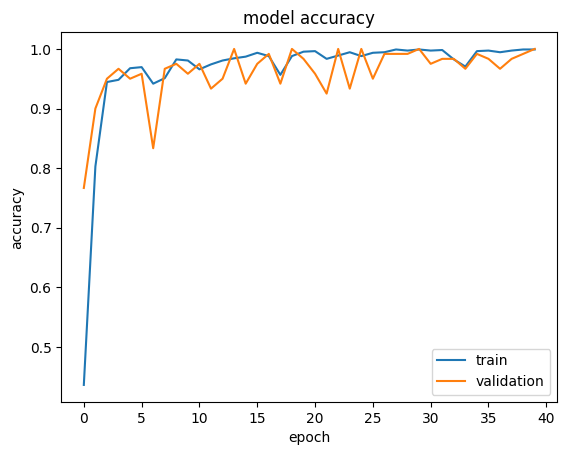

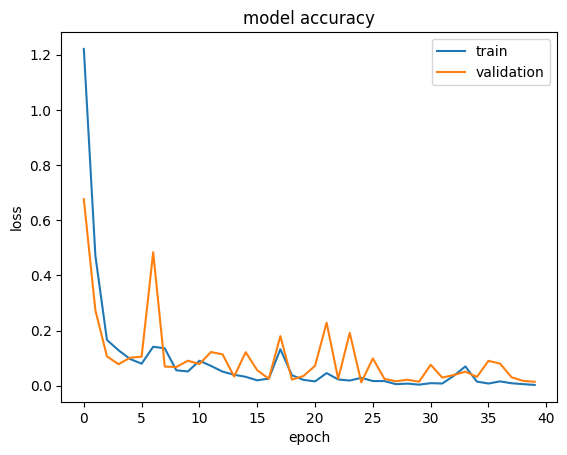

In [26]:
# Printing a graph showing the accuracy changes during the training phase
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# Printing a graph showing the loss changes during the training phase
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# 1.5 Prediction using trained model

In [11]:
import random

img_size = 50

data_test_dir = 'E:/datasets/coffee bean/test'

categories = ['Dark', 'Green', 'Light','Medium']

for category in categories :
    path = os.path.join(data_test_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)

testing_data = []

def create_training_data():
    for category in categories :
        path = os.path.join(data_test_dir, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

Xt = [] #features
yt = [] #labels

for features, label in training_data:
    Xt.append(features)
    yt.append(label)

Xt = np.array(Xt).reshape(-1, img_size, img_size, 3)
y = np.asarray(yt)

In [12]:
pickle_out = open("Xt.pickle", "wb")
pickle.dump(Xt, pickle_out)
pickle_out.close()

pickle_out = open("yt.pickle", "wb")
pickle.dump(yt, pickle_out)
pickle_out.close()

pickle_in = open("Xt.pickle", "rb")
Xt = pickle.load(pickle_in)
Xt = Xt/255

In [13]:
pred = model.predict(Xt)

50/50 [==============================] - 0s 4ms/step


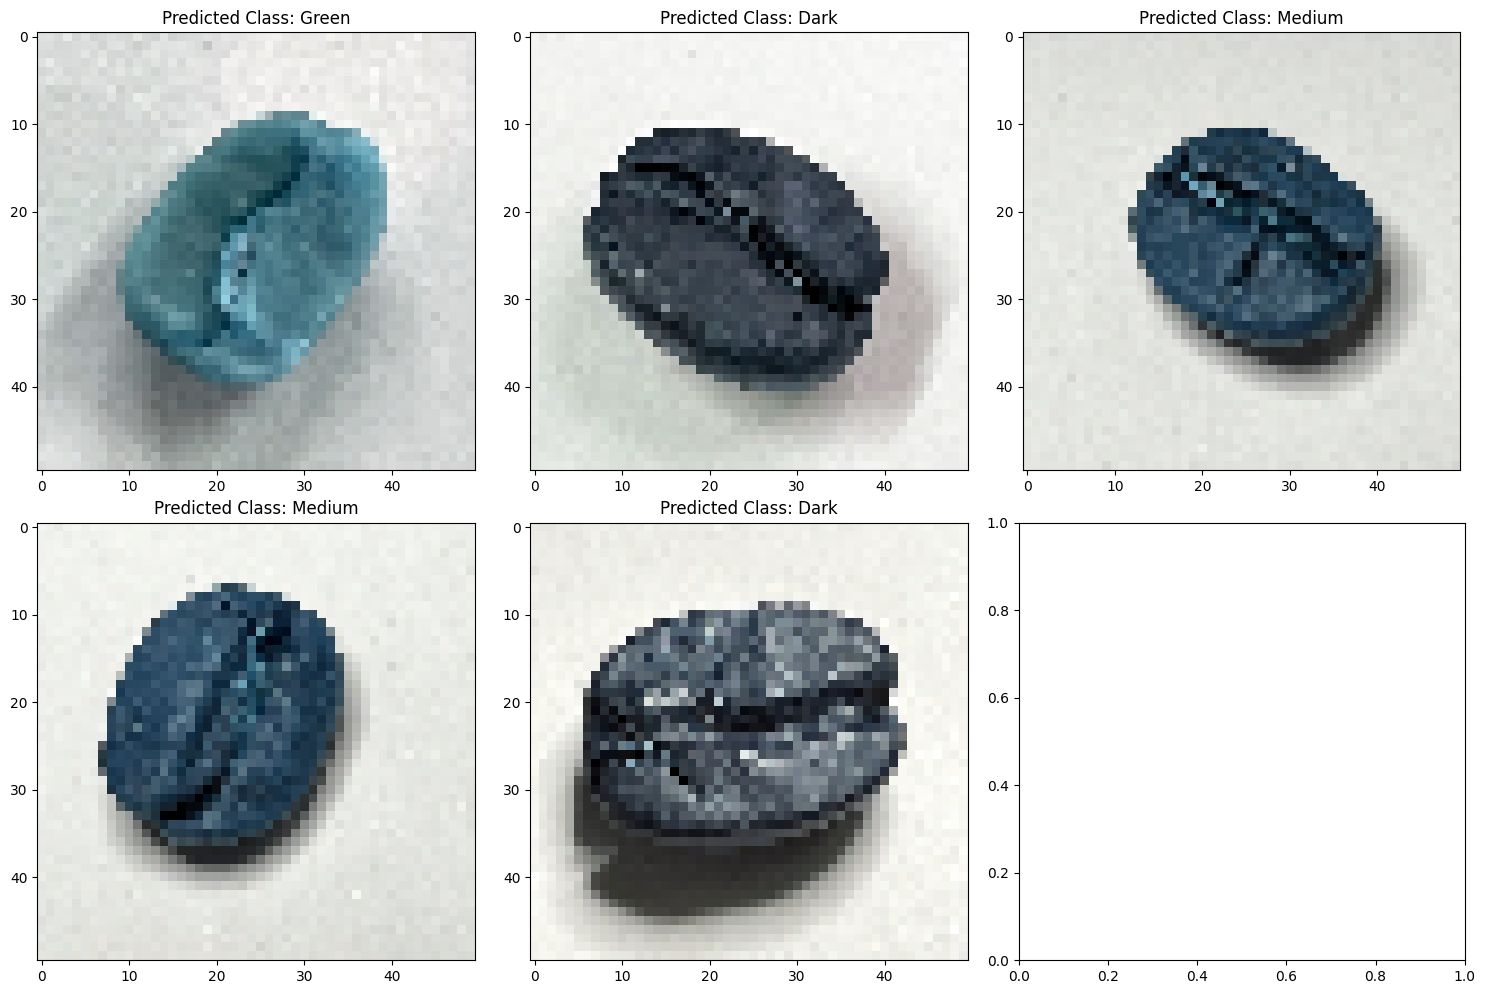

In [24]:
# # Showing random predictions with images
# num_samples_to_show = 5
# indices_to_show = random.sample(range(len(Xt)), num_samples_to_show)

# for index in indices_to_show:
#     prediction = pred[index]
#     predicted_class_index = np.argmax(prediction)
#     predicted_class = CATEGORIES[predicted_class_index]
    
#     plt.imshow(Xt[index])
#     plt.title(f"Predicted Class: {predicted_class}")
#     plt.show()

# Calculate the number of rows based on the number of samples and the desired number of columns per row
num_rows = (num_samples_to_show + 2) // 3

# Showing random predictions with images
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 10))

for i, index in enumerate(indices_to_show):
    prediction = pred[index]
    predicted_class_index = np.argmax(prediction)
    predicted_class = CATEGORIES[predicted_class_index]
    
    row_index = i // 3  # Calculate the row index
    col_index = i % 3   # Calculate the column index
    
    axes[row_index, col_index].imshow(Xt[index])
    axes[row_index, col_index].set_title(f"Predicted Class: {predicted_class}")

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()